In [1]:
import pandas as pd

Problem Statement
         Given the plot of a movie, predict the genre of the movie.


In [2]:
df = pd.read_csv("wiki_movie_plots_deduped.csv")

In [3]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
import sqlite3
con = sqlite3.connect('movie_plots.db')

Cleaning function

In [5]:
import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [6]:
num_rows = len(df)
num_rows

34886

Sample based on the genre column. 

In [7]:
genres = df['Genre'].value_counts()
sorted_genres = genres.sort_values(ascending=False)
sorted_genres

unknown                            6083
drama                              5964
comedy                             4379
horror                             1167
action                             1098
                                   ... 
musical, social, drama, romance       1
vampire film                          1
epic film                             1
comedy, crime, romance                1
horror romantic comedy                1
Name: Genre, Length: 2265, dtype: int64

In [8]:
min_samples = 310
filtered_genres = genres[genres >= min_samples].index
filtered_genres

Index(['unknown', 'drama', 'comedy', 'horror', 'action', 'thriller', 'romance',
       'western', 'crime', 'adventure', 'musical', 'crime drama',
       'romantic comedy', 'science fiction', 'film noir', 'mystery'],
      dtype='object')

In [9]:
balanced_df = pd.DataFrame()
for genre  in filtered_genres:
     subset = df[df['Genre'] == genre].sample(min_samples, replace=True)
     balanced_df = pd.concat([balanced_df, subset], ignore_index=True)

balanced_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1970,Samskara,Kannada,Pattabhi Rama Reddy,"Girish Karnad, P. Lankesh, Lakshmi Krishnamurt...",unknown,https://en.wikipedia.org/wiki/Samskara_(film),The story is set in a street in a small villag...
1,2001,Nagaravadhu,Malayalam,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Nagaravadhu,Vani Viswanath plays the central character of ...
2,1970,Nadu Iravil,Tamil,S. Balachander,"S. Balachander, Sowcar Janaki, Major Sundarraj...",unknown,https://en.wikipedia.org/wiki/Nadu_Iravil,Dhayanandam is a rich man who takes care of hi...
3,2014,We Are Brothers,South_Korean,Jang Jin,"Cho Jin-woong, Kim Sung-kyun",unknown,https://en.wikipedia.org/wiki/We_Are_Brothers,Two brothers were separated in childhood at an...
4,1992,Naked Killer,Hong Kong,Clarence Fok Yiu-leung,"Chingmy Yau, Simon Yam, Carrie Ng",unknown,https://en.wikipedia.org/wiki/Naked_Killer,Kitty (Chingmy Yau) is a vicious young woman w...


In [10]:
df = balanced_df

In [11]:
df["plot_clean"] = ''

In [12]:
col_types = df.dtypes
col_types

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
plot_clean          object
dtype: object

In [13]:
for i, row in df.iterrows():
    df.at[i, "plot_clean"] = clean(row.Plot)

In [14]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_clean
0,1970,Samskara,Kannada,Pattabhi Rama Reddy,"Girish Karnad, P. Lankesh, Lakshmi Krishnamurt...",unknown,https://en.wikipedia.org/wiki/Samskara_(film),The story is set in a street in a small villag...,The story is set in a street in a small villag...
1,2001,Nagaravadhu,Malayalam,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Nagaravadhu,Vani Viswanath plays the central character of ...,Vani Viswanath plays the central character of ...
2,1970,Nadu Iravil,Tamil,S. Balachander,"S. Balachander, Sowcar Janaki, Major Sundarraj...",unknown,https://en.wikipedia.org/wiki/Nadu_Iravil,Dhayanandam is a rich man who takes care of hi...,Dhayanandam is a rich man who takes care of hi...
3,2014,We Are Brothers,South_Korean,Jang Jin,"Cho Jin-woong, Kim Sung-kyun",unknown,https://en.wikipedia.org/wiki/We_Are_Brothers,Two brothers were separated in childhood at an...,Two brothers were separated in childhood at an...
4,1992,Naked Killer,Hong Kong,Clarence Fok Yiu-leung,"Chingmy Yau, Simon Yam, Carrie Ng",unknown,https://en.wikipedia.org/wiki/Naked_Killer,Kitty (Chingmy Yau) is a vicious young woman w...,Kitty (Chingmy Yau) is a vicious young woman w...


NLP

Load spacy

In [15]:
import spacy 
nlp = spacy.load("en_core_web_sm")

Perform NLP on the dataset

In [16]:
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["plot_clean"] and len(str(row["plot_clean"])) < 1000000):
        doc = nlp(str(row["plot_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "plot_lemma"] = " ".join(lemmas)                
        df.at[i, "plot_nouns"] = " ".join(nouns)
        df.at[i, "plot_adjectives"] = " ".join(adjectives)
        df.at[i, "plot_verbs"] = " ".join(verbs)
        df.at[i, "plot_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000


In [17]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_clean,plot_lemma,plot_nouns,plot_adjectives,plot_verbs,plot_nav,no_tokens
0,1970,Samskara,Kannada,Pattabhi Rama Reddy,"Girish Karnad, P. Lankesh, Lakshmi Krishnamurt...",unknown,https://en.wikipedia.org/wiki/Samskara_(film),The story is set in a street in a small villag...,The story is set in a street in a small villag...,the story be set in a street in a small villag...,story street village Durvasapura Western Ghats...,small traditional main devout main willing foc...,set call live belong stay have follow define c...,story street village Durvasapura Western Ghats...,563.0
1,2001,Nagaravadhu,Malayalam,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Nagaravadhu,Vani Viswanath plays the central character of ...,Vani Viswanath plays the central character of ...,Vani Viswanath play the central character of S...,Vani Viswanath character Sukanya student polit...,central young charming medical shrewd fake,play name develop lead orchestrate force satis...,Vani Viswanath character Sukanya student polit...,89.0
2,1970,Nadu Iravil,Tamil,S. Balachander,"S. Balachander, Sowcar Janaki, Major Sundarraj...",unknown,https://en.wikipedia.org/wiki/Nadu_Iravil,Dhayanandam is a rich man who takes care of hi...,Dhayanandam is a rich man who takes care of hi...,dhayanandam be a rich man who take care of his...,dhayanandam man care wife Ponni child Dr. Sara...,rich close real handicapped,take have tell die go give call come murder te...,dhayanandam man care wife Ponni child Dr. Sara...,102.0
3,2014,We Are Brothers,South_Korean,Jang Jin,"Cho Jin-woong, Kim Sung-kyun",unknown,https://en.wikipedia.org/wiki/We_Are_Brothers,Two brothers were separated in childhood at an...,Two brothers were separated in childhood at an...,two brother be separate in childhood at an orp...,brother childhood orphanage adult year reunion...,other,separate find suffer disappear raise go search,brother childhood orphanage adult year reunion...,74.0
4,1992,Naked Killer,Hong Kong,Clarence Fok Yiu-leung,"Chingmy Yau, Simon Yam, Carrie Ng",unknown,https://en.wikipedia.org/wiki/Naked_Killer,Kitty (Chingmy Yau) is a vicious young woman w...,Kitty (Chingmy Yau) is a vicious young woman w...,Kitty ( Chingmy Yau ) be a vicious young woman...,Kitty Chingmy Yau woman qualm girlfriend man g...,vicious young traumatic own subtle impotent sa...,have stab bully undergo shoot vomit handle inj...,Kitty Chingmy Yau woman qualm girlfriend man g...,797.0


Save to database

In [19]:
df.to_sql('plot_nlp1', con)

4960

In [20]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

Library import & Settings

In [21]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [22]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

Basic Properties of the dataset

In [23]:
df.dtypes

Release Year        int64  
Title               object 
Origin/Ethnicity    object 
Director            object 
Cast                object 
Genre               object 
Wiki Page           object 
Plot                object 
plot_clean          object 
plot_lemma          object 
plot_nouns          object 
plot_adjectives     object 
plot_verbs          object 
plot_nav            object 
no_tokens           float64
dtype: object

In [24]:
# select a sample of some data frame columns
df[['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre']] \
  .sample(4, random_state=42)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre
3135,1951,Golden Girl,American,Lloyd Bacon,"Mitzi Gaynor, Dale Robertson, Una Merkel",musical
2191,1952,Montana Territory,American,Ray Nazarro,"Wanda Hendrix, Preston Foster",western
1295,1990,The Ambulance,American,Larry Cohen,"Eric Roberts, James Earl Jones, Megan Gallagher",action
2902,1979,Hurricane,American,Jan Troell,"Mia Farrow, Jason Robards, Max von Sydow",adventure


In [25]:
len(df)

4960

In [26]:
df.count()

Release Year        4960
Title               4960
Origin/Ethnicity    4960
Director            4960
Cast                4859
Genre               4960
Wiki Page           4960
Plot                4960
plot_clean          4960
plot_lemma          4960
plot_nouns          4960
plot_adjectives     4960
plot_verbs          4960
plot_nav            4960
no_tokens           4960
dtype: int64

In [27]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release Year      4960 non-null   int64  
 1   Title             4960 non-null   object 
 2   Origin/Ethnicity  4960 non-null   object 
 3   Director          4960 non-null   object 
 4   Cast              4859 non-null   object 
 5   Genre             4960 non-null   object 
 6   Wiki Page         4960 non-null   object 
 7   Plot              4960 non-null   object 
 8   plot_clean        4960 non-null   object 
 9   plot_lemma        4960 non-null   object 
 10  plot_nouns        4960 non-null   object 
 11  plot_adjectives   4960 non-null   object 
 12  plot_verbs        4960 non-null   object 
 13  plot_nav          4960 non-null   object 
 14  no_tokens         4960 non-null   float64
dtypes: float64(1), int64(1), object(13)
memory usage: 69.1 MB


 Exploring Column Summaries

In [28]:
Summary for Categorical Features

SyntaxError: invalid syntax (1133278068.py, line 1)

In [29]:
columns = [col for col in df.columns if not col.startswith('plot')]
columns

['Release Year',
 'Title',
 'Origin/Ethnicity',
 'Director',
 'Cast',
 'Genre',
 'Wiki Page',
 'Plot',
 'no_tokens']

In [30]:
# describe categorical columns of type np.object 
df[columns] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
Title,4960,3959,Dark Waters,6
Origin/Ethnicity,4960,22,American,3270
Director,4960,2431,Unknown,62
Cast,4859,3887,"Basil Rathbone, Nigel Bruce",9
Genre,4960,16,unknown,310
Wiki Page,4960,3996,https://en.wikipedia.org/wiki/Dark_Waters_(1944_film),6
Plot,4960,3994,"A shaken survivor of a ship sunk by a submarine travels to her aunt and uncle's Louisiana plantation to recuperate, but her relatives have other ideas.",6


In [31]:
df['Genre'].value_counts()[:10]

unknown      310
drama        310
comedy       310
horror       310
action       310
thriller     310
romance      310
western      310
crime        310
adventure    310
Name: Genre, dtype: int64

Exploring Text Categories

Normalize column names

In [32]:
df.columns = df.columns.str.lower()  # 
df.columns = df.columns.str.replace(' ', '_')  
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True) 

In [33]:
df.columns

Index(['release_year', 'title', 'originethnicity', 'director', 'cast', 'genre',
       'wiki_page', 'plot', 'plot_clean', 'plot_lemma', 'plot_nouns',
       'plot_adjectives', 'plot_verbs', 'plot_nav', 'no_tokens'],
      dtype='object')

In [34]:
df['genre'].nunique()

16

In [35]:
Exploring Word Frequencies

SyntaxError: invalid syntax (1220459344.py, line 1)

In [36]:
# create a data frame slice
sub_df = df[df['genre']=='western']
# sample cleaned text and tokens tagged as nouns
sub_df[['plot_clean', 'plot_nouns']].sample(2)

,plot_clean,plot_nouns
2296,"Ben Lane (Audie Murphy) is breaking a horse in the desert that he believes to be stray. He is caught by some farmers who believe he is a horse thief when he is saved by Frank Jesse (Dan Duryea). Lane and Jesse are hired by Kelly (Joan O'Brien) who pays them to take her to a town to be with her husband. In reality, Kelly is setting up Jesse because he killed her husband in a shootout. A unique part of the film is that Lane takes in a collie dog that goes with him everywhere, including riding the pack horse.",Ben Lane Audie Murphy horse desert farmer horse thief Frank Jesse Dan Duryea Lane Jesse Kelly Joan O'Brien town husband reality Kelly Jesse husband shootout part film Lane collie dog pack horse
2211,"Stagecoach guard Larry Delong is ambushed by a gang of outlaws associated with a man he's searching for, Dan Marady, who murdered Delong's sister and nephew. But when he returns to the town of Deep Water, nearly everyone there believes that Delong was involved in the holdup, in which the stage driver was killed.\r\nWith no townspeople other than Orissa Flynn, his sweetheart, and Doc Winkler heeding his warnings that Marady's men are coming to rob the town, Delong is forced to take refuge in a cantina. A lynch mob forms, with deputy Tub Murphy trying to hold them off until the sheriff's posse returns.\r\nMarady's men, including an accomplice, Pinto, rob the bank while the villagers are distracted. Delong escapes through an attic and sabotage the getaway horses of Malady's gang. A shootout results in Marady mistakenly believing, fatally, that Delong is out of bullets.",stagecoach guard Larry Delong gang outlaws man Dan Marady Delong sister nephew town Deep Water Delong holdup stage driver townspeople Orissa Flynn sweetheart Doc Winkler warning Marady man town Delong refuge cantina lynch mob form deputy Tub Murphy sheriff posse return Marady man accomplice Pinto rob bank villager Delong attic getaway horse Malady gang shootout result Marady Delong bullet


Creating a list of tokens from a list of documents

In [37]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [38]:
# transform list of documents into a single list of tokens
tokens = sub_df.plot_nouns.map(my_tokenizer).sum()

In [39]:
print(tokens[:200])

['way', 'Mexico', 'West', 'Texas', 'Tom', 'Buchanan', 'Randolph', 'Scott', 'border', 'town', 'Agry', 'feud', 'member', 'family', 'revenge', 'Buchanan', 'drifter', 'Jim', 'Garry', 'friend', 'Tate', 'Riling', 'Garry', 'reservation', 'middle', 'conflict', 'cattle', 'owner', 'homesteader', 'cattle', 'owner', 'John', 'Lufton', 'daughter', 'Amy', 'Carol', 'Luftons', 'Garry', 'Riling', 'side', 'Amy', 'Garry', 'friend', 'riling', 'Garry', 'agent', 'Jake', 'Pindalest', 'scheme', 'Lufton', 'herd', 'Pindalest', 'government', 'Lufton', 'cattle', 'reservation', 'week', 'riling', 'homesteader', 'move', 'interest', 'option', 'Lufton', 'herd', 'bargain', 'price', 'Lufton', 'riling', 'stranger', 'Garry', 'Pindalest', 'government', 'herd', 'price', 'Garry', 'part', 'swindle', 'Lufton', 'riling', 'herd', 'Riling', 'man', 'cattle', 'reservation', 'day', 'herd', 'time', 'Lufton', 'deadline', 'Garry', 'man', 'stampede', 'side', 'Amy', 'Garry', 'content', 'letter', 'riling', 'Carol', 'riling', 'information',

Counting Frequencies with a Counter

In [40]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('man', 467),
 ('town', 333),
 ('ranch', 185),
 ('gang', 179),
 ('horse', 160),
 ('gun', 155),
 ('gold', 147),
 ('father', 138),
 ('train', 138),
 ('Gene', 136),
 ('sheriff', 134),
 ('John', 127),
 ('Jack', 127),
 ('cattle', 114),
 ('brother', 113),
 ('Joe', 109),
 ('woman', 108),
 ('time', 107),
 ('friend', 105),
 ('money', 104)]

In [41]:
df.genre.unique()

array(['unknown', 'drama', 'comedy', 'horror', 'action', 'thriller',
       'romance', 'western', 'crime', 'adventure', 'musical',
       'crime drama', 'romantic comedy', 'science fiction', 'film noir',
       'mystery'], dtype=object)

In [42]:
print([t[0] for t in counter.most_common(200)])  

['man', 'town', 'ranch', 'gang', 'horse', 'gun', 'gold', 'father', 'train', 'Gene', 'sheriff', 'John', 'Jack', 'cattle', 'brother', 'Joe', 'woman', 'time', 'friend', 'money', 'son', 'wagon', 'way', 'life', 'wife', 'Tex', 'Jim', 'boy', 'year', 'Texas', 'Indians', 'outlaw', 'bank', 'robbery', 'day', 'death', 'love', 'daughter', 'land', 'rancher', 'posse', 'Ben', 'deputy', 'Dan', 'Tom', 'fight', 'Harry', 'night', 'law', 'Charlie', 'Mexico', 'James', 'jail', 'Frank', 'Lee', 'Kane', 'Kid', 'plan', 'Jeff', 'group', 'stagecoach', 'Rio', 'owner', 'Martin', 'camp', 'Karl', 'partner', 'fort', 'Lettie', 'hand', 'Barbarosa', 'George', 'Jesse', 'Andersen', 'job', 'help', 'Sam', 'Miller', 'Colorado', 'murder', 'railroad', 'Burns', 'order', 'attack', 'Cole', 'bandit', 'Ethan', 'Bill', 'child', 'home', 'husband', 'Doc', 'Sheriff', 'mine', 'cowboy', 'attempt', 'Brett', 'Johnny', 'war', 'Roy', 'Rose', 'Herod', 'West', 'Carter', 'Mary', 'trail', 'Younger', 'Cheyenne', 'Owen', 'side', 'interest', 'War', '

In [43]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

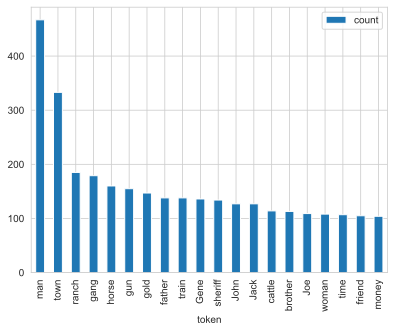

In [44]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

Using word Clouds

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

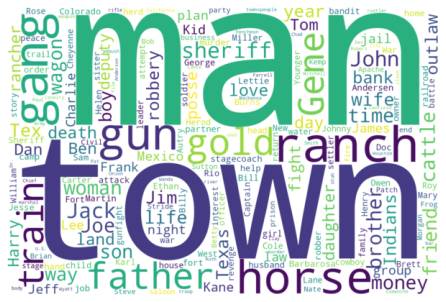

In [47]:
# create wordcloud
wordcloud(counter)

Comparing to Musical

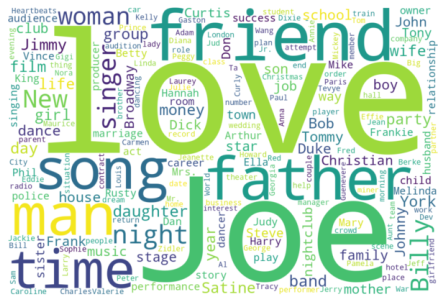

In [48]:
tokens2 = df[df['genre']=='musical'].plot_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

Exploring Text Complexity

In [49]:
df['no_tokens'] = df.plot_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

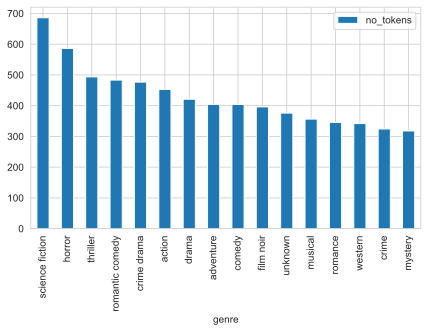

In [50]:
#mean number of tokens by category
df.groupby(['genre']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [51]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

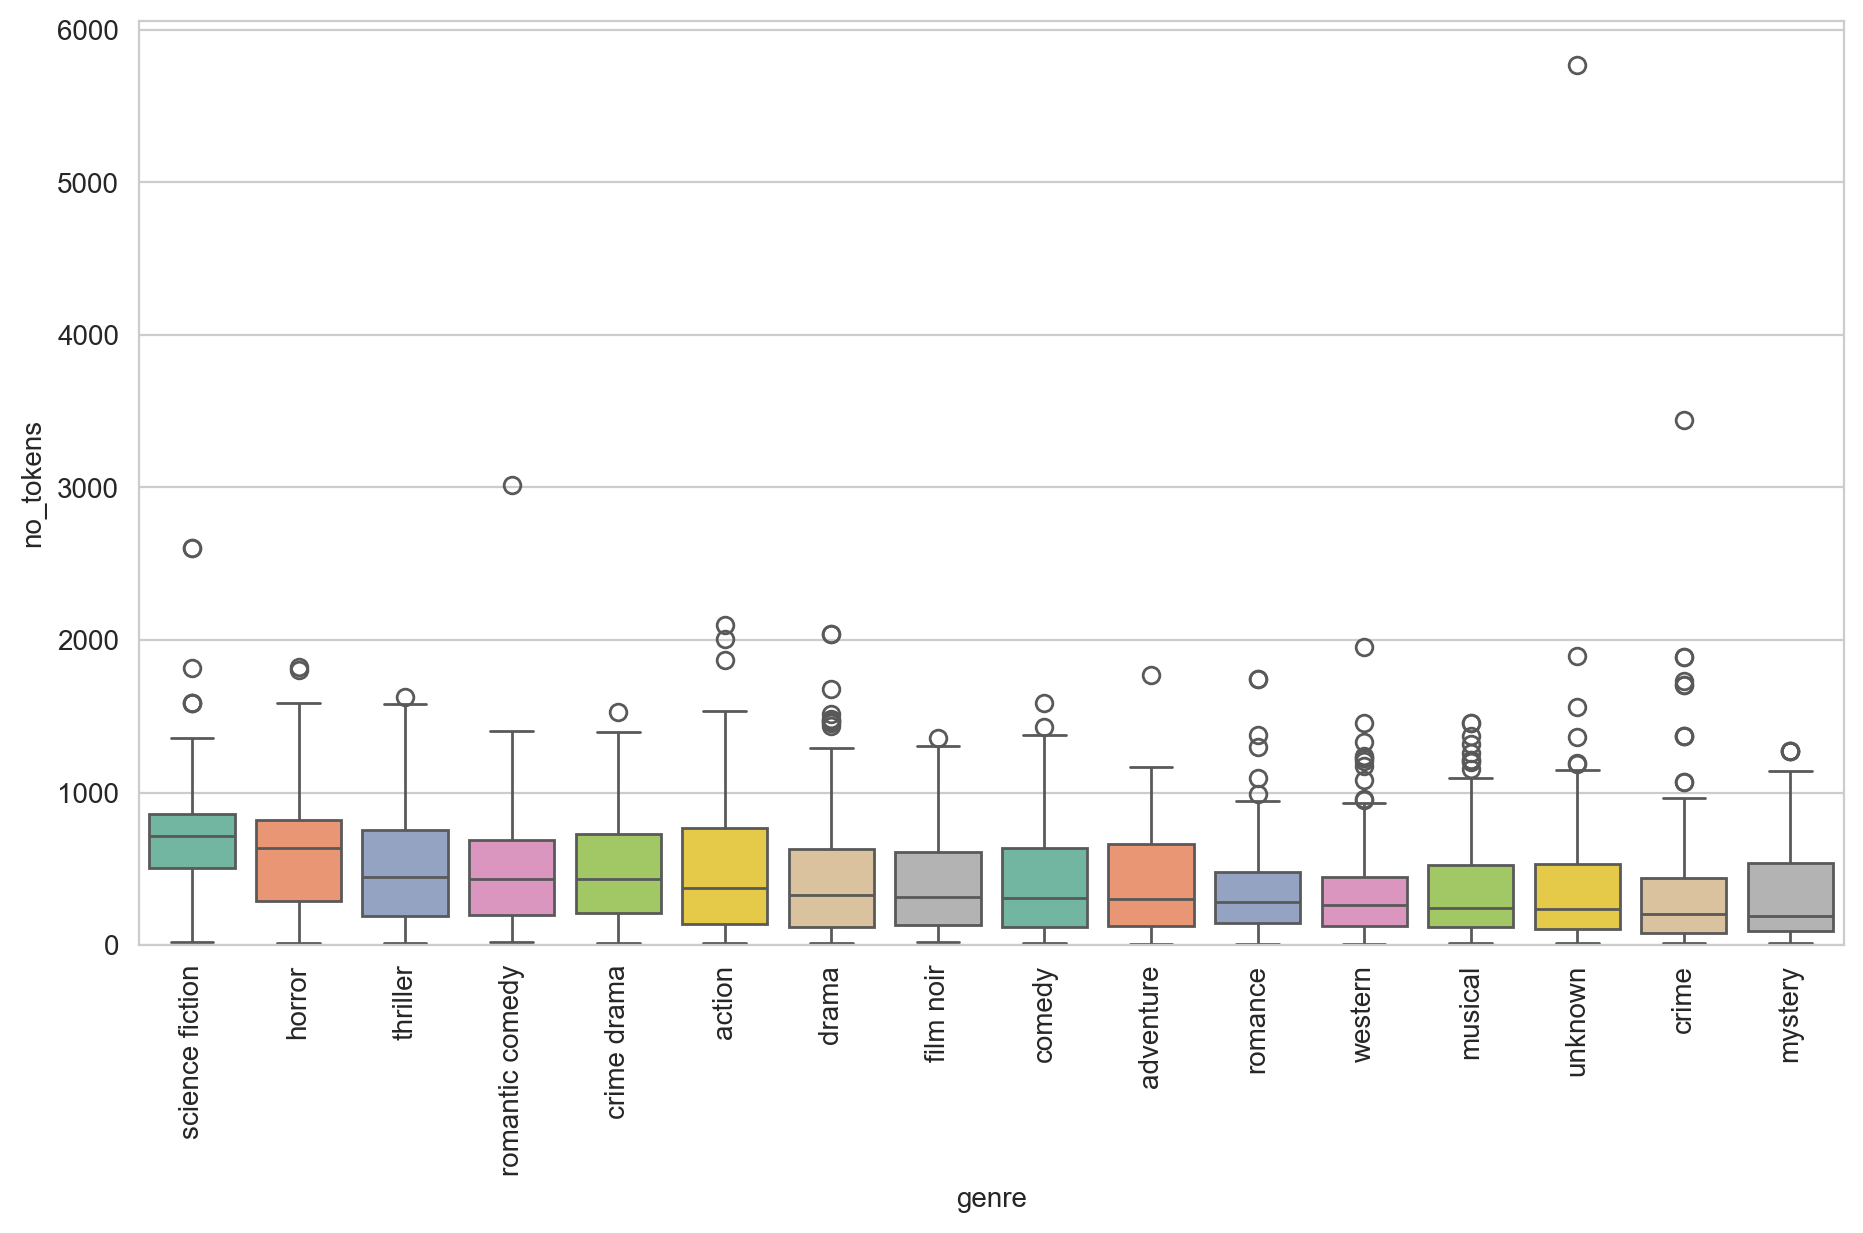

In [52]:
multi_boxplot(df, 'genre', 'no_tokens');

#print text of outliers


In [53]:
df['plot_lemma'][df.no_tokens > 2500]

74      the opening scene show a group of illegal immigrant that be be prepare to be smuggle to South Korea inside a shipping container . as they be about to be send overseas , one of the trafficker notice people cough . after the immigrant deny any illness , he seal the container which be then send to Korea . 9 day later , on May 1 , the container reach Pyongtaek harbor , and be transport inland . \r\n the movie then cut to a rescue operation conduct by the Budang ERT ( Emergency Response Team ) , who be attempt to rescue a woman who drive her car into an open shaft . one of the member , Kang Ji - goo rappel into the shaft and manage to rescue the woman , Dr. Kim In - hae , moment before the car fall to the bottom of the shaft . despite having save her life , in - hae be ungrateful towards Ji - goo , claim that he be brag when it be simply his job to rescue she . he later admit to his co - worker Bae Kyung - ub that he find In - hae attractive . he be then tell by the station chief th

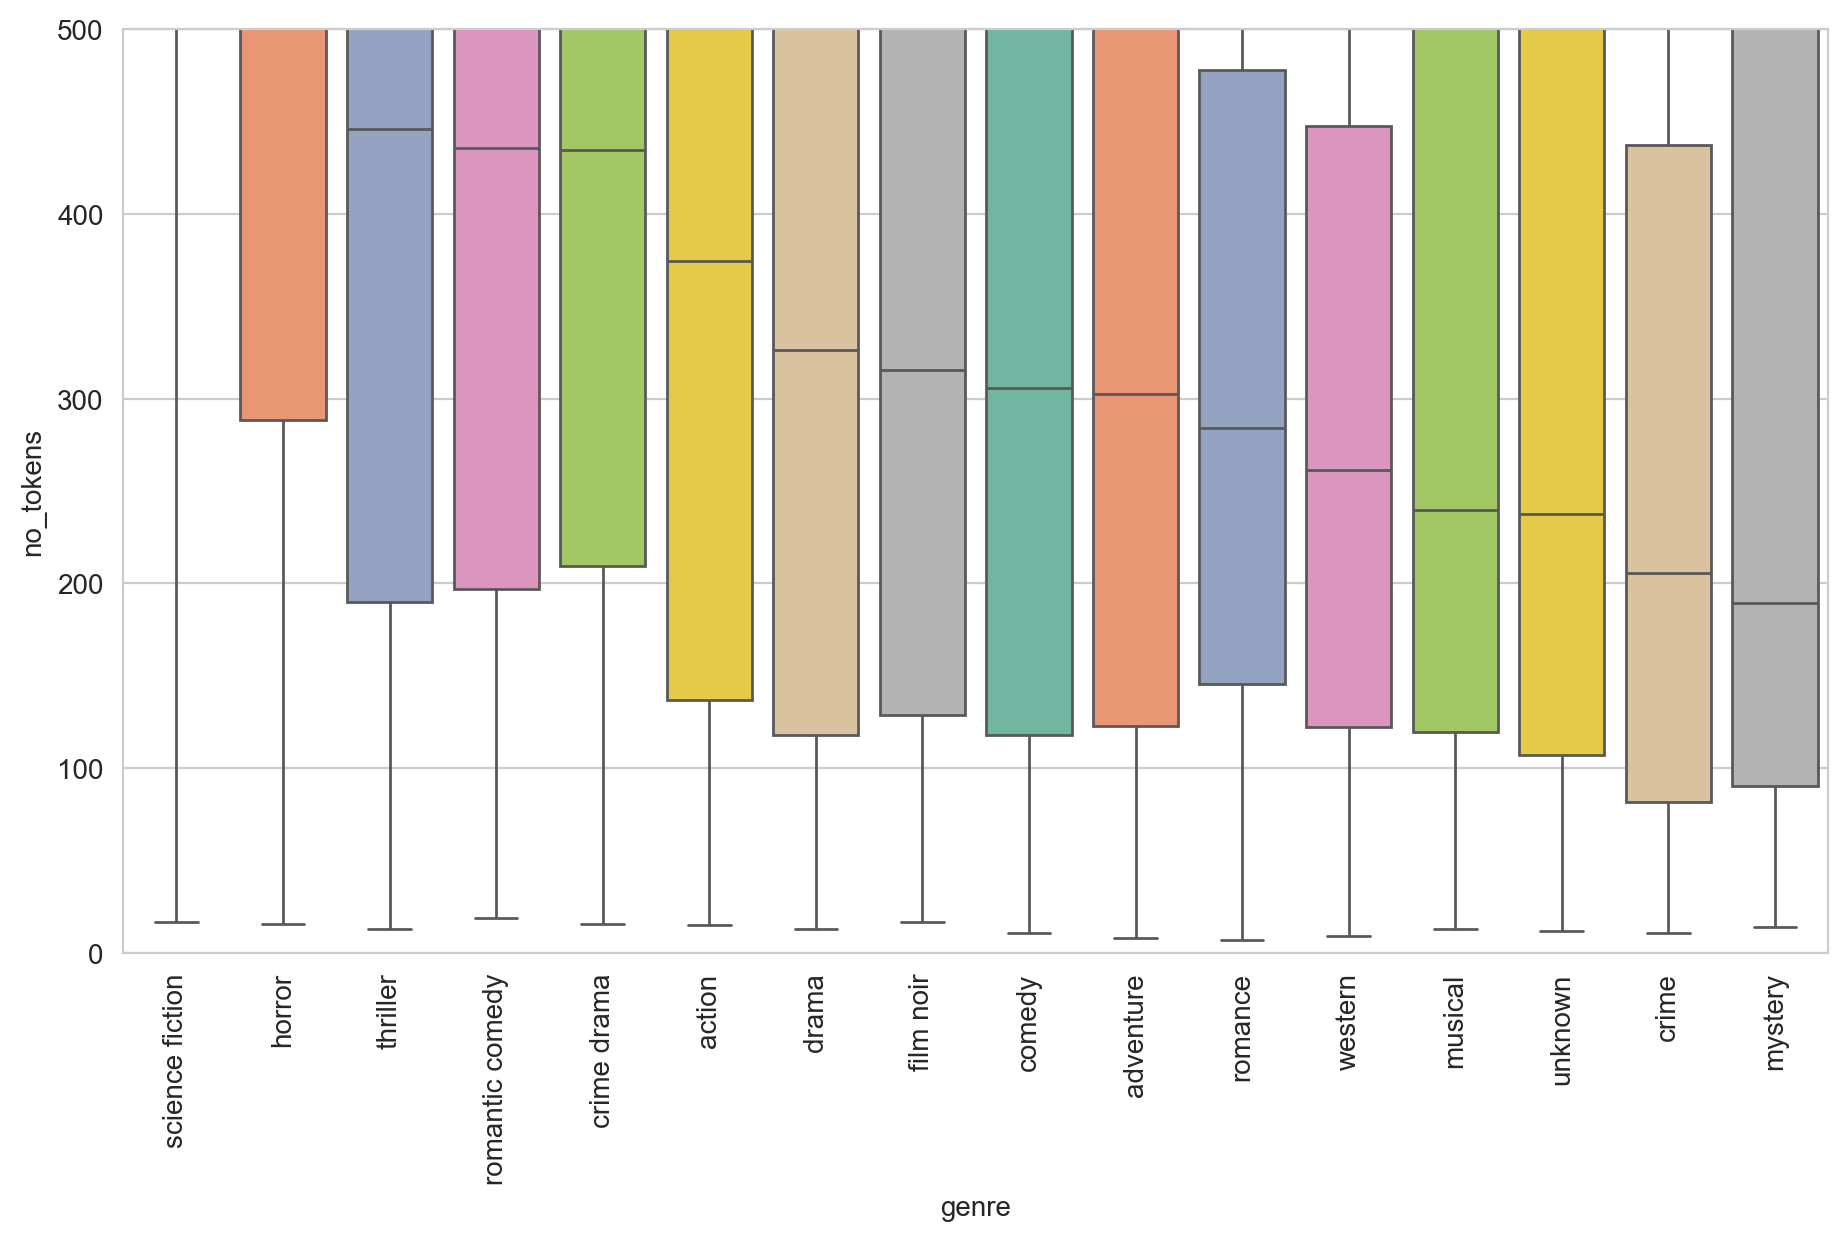

In [54]:
# cut-off diagram at y=500
multi_boxplot(df, 'genre', 'no_tokens', ylim=500)